In [1]:
import pandas as pd

#Загрудаем датасет
file_path = '/content/bank_dataset.csv'
data = pd.read_csv(file_path)

# Отображаем первые несколько строк датасета, чтобы понять его структуру
data.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Тип и формат представления данных в каждом столбце:

userid: целочисленный, уникальный идентификатор пользователя.

score: целочисленный, кредитный рейтинг пользователя.

City: строковый, название города.

Gender: строковый, пол пользователя (М или Ж).

Age: целочисленный, возраст пользователя.

Objects: целочисленный, количество объектов (возможно, имущества) у пользователя.

Balance: числовой с плавающей запятой, баланс на счете (присутствуют пропуски).

Products: целочисленный, количество продуктов, используемых клиентом.

CreditCard: целочисленный, признак наличия кредитной карты (1 - есть, 0 - нет).

Loyalty: целочисленный, признак лояльности клиента (1 - лояльный, 0 - нет).

estimated_salary: числовой с плавающей запятой, предполагаемая зарплата
пользователя.

Churn: целочисленный, признак ухода клиента (1 - ушел, 0 - остался).

## Проверка гипотезы о нормальности распределения и построение корреляционной матрицы  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6383.
  res = hypotest_fun_out(*samples, **kwds)


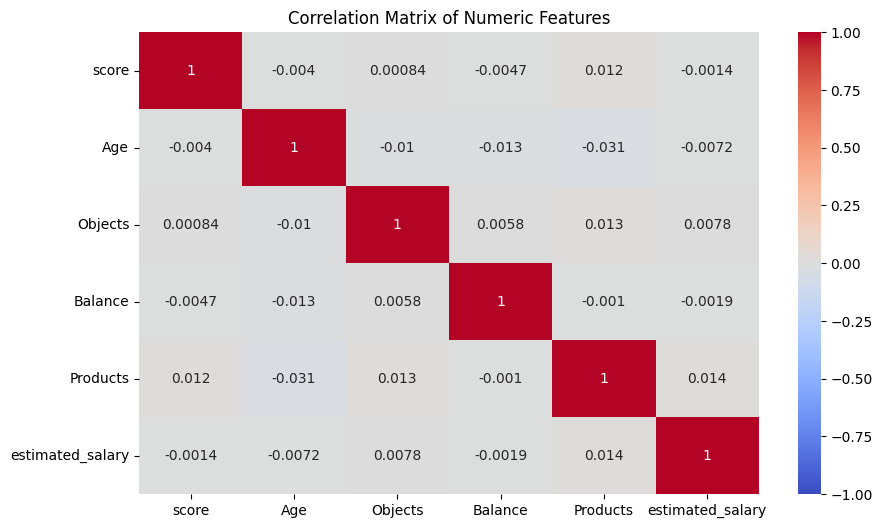

{'score': {'W-statistic': 0.9939220101608282,
  'p-value': 3.470965102195033e-20},
 'Age': {'W-statistic': 0.9441067968735424, 'p-value': 1.3079365657693273e-51},
 'Balance': {'W-statistic': 0.9993934901670786,
  'p-value': 0.02969386956389632},
 'estimated_salary': {'W-statistic': 0.9566422556695033,
  'p-value': 3.056073071154199e-47}}

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Проверка гипотезы о нормальности распределения
# Для проверки нормальности используем тест Шапиро-Уилка для нескольких числовых столбцов

columns_to_test = ['score', 'Age', 'Balance', 'estimated_salary']

# Создание словаря для хранения результатов теста Шапиро-Уилка
normality_results = {}
for column in columns_to_test:
    stat, p_value = stats.shapiro(data[column].dropna())  # Игнорируем пропущенные значения
    normality_results[column] = {'W-statistic': stat, 'p-value': p_value}

# Шаг 2: Проверка корреляции признаков (числовых столбцов)
# Вычислим матрицу корреляции и построим тепловую карту корреляций
correlation_matrix = data[['score', 'Age', 'Objects', 'Balance', 'Products', 'estimated_salary']].corr()

# Визуализация тепловой карты корреляции
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Вывод результатов теста на нормальность
normality_results


## Предварительная обработка данных

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Preliminary Data Processing and Quality Check (EDA)
# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Check for duplicate rows
duplicates = data.duplicated().sum()

# 3. Descriptive statistics to understand data distributions
descriptive_stats = data.describe()

# Step 2: Normality Check with Shapiro-Wilk test
# Select numerical columns for the normality test
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Perform Shapiro-Wilk test and store results in a dictionary
alpha = 0.05
normality_results = {'Column': [], 'W-statistic': [], 'p-value': [], 'Interpretation': []}

for column in numerical_columns:
    w_stat, p_value = stats.shapiro(data[column].dropna())  # drop NaN values for the test
    interpretation = "Normal" if p_value > alpha else "Not Normal"

    # Append results
    normality_results['Column'].append(column)
    normality_results['W-statistic'].append(w_stat)
    normality_results['p-value'].append(p_value)
    normality_results['Interpretation'].append(interpretation)

# Convert normality results to DataFrame for display
normality_results_df = pd.DataFrame(normality_results)

# Display EDA results and normality check results
import ace_tools as tools; tools.display_dataframe_to_user(name="Normality Test Results", dataframe=normality_results_df)

missing_values, duplicates, descriptive_stats


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6383.
  res = hypotest_fun_out(*samples, **kwds)


ModuleNotFoundError: No module named 'ace_tools'

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Load the dataset
data = pd.read_csv(file_path)

# Preliminary Data Processing and Quality Check (EDA)
# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Check for duplicate rows
duplicates = data.duplicated().sum()

# 3. Descriptive statistics to understand data distributions
descriptive_stats = data.describe()

# Step 2: Normality Check with Shapiro-Wilk test
# Select numerical columns for the normality test
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Perform Shapiro-Wilk test and store results in a dictionary
alpha = 0.05
normality_results = {'Column': [], 'W-statistic': [], 'p-value': [], 'Interpretation': []}

for column in numerical_columns:
    w_stat, p_value = stats.shapiro(data[column].dropna())  # drop NaN values for the test
    interpretation = "Normal" if p_value > alpha else "Not Normal"

    # Append results
    normality_results['Column'].append(column)
    normality_results['W-statistic'].append(w_stat)
    normality_results['p-value'].append(p_value)
    normality_results['Interpretation'].append(interpretation)

# Convert normality results to DataFrame for display
normality_results_df = pd.DataFrame(normality_results)

# Display EDA results and normality check results
# Instead of using 'ace_tools', display the DataFrame directly using print or display
print("Normality Test Results:")
print(normality_results_df)  # or display(normality_results_df) in a Jupyter Notebook

missing_values, duplicates, descriptive_stats

Normality Test Results:
             Column  W-statistic       p-value Interpretation
0            userid     0.955405  1.025388e-47     Not Normal
1             score     0.993922  3.470965e-20     Not Normal
2               Age     0.944107  1.307937e-51     Not Normal
3           Objects     0.948627  3.884747e-50     Not Normal
4           Balance     0.999393  2.969387e-02     Not Normal
5          Products     0.706093  4.358341e-85     Not Normal
6        CreditCard     0.572088  7.521095e-94     Not Normal
7           Loyalty     0.636294  5.277607e-90     Not Normal
8  estimated_salary     0.956642  3.056073e-47     Not Normal
9             Churn     0.493920  6.620395e-98     Not Normal


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6383.
  res = hypotest_fun_out(*samples, **kwds)


(userid                 0
 score                  0
 City                   0
 Gender                 0
 Age                    0
 Objects                0
 Balance             3617
 Products               0
 CreditCard             0
 Loyalty                0
 estimated_salary       0
 Churn                  0
 dtype: int64,
 0,
              userid         score           Age       Objects        Balance  \
 count  1.000000e+04  10000.000000  10000.000000  10000.000000    6383.000000   
 mean   1.573368e+07    650.528800     38.921800      5.012800  119827.493793   
 std    7.193619e+04     96.653299     10.487806      2.892174   30095.056462   
 min    1.560844e+07    350.000000     18.000000      0.000000    3768.690000   
 25%    1.567126e+07    584.000000     32.000000      3.000000  100181.975000   
 50%    1.573347e+07    652.000000     37.000000      5.000000  119839.690000   
 75%    1.579597e+07    718.000000     44.000000      7.000000  139512.290000   
 max    1.585843e+07 

## Интерпретация результатов выполнения анализа

In [3]:
# Дополняем код интерпретацией результатов

# Шаг 1: Проверка гипотезы о нормальности распределения и интерпретация результатов
# Для каждого столбца определяем, является ли распределение нормальным на основе p-значения

normality_interpretation = {}
alpha = 0.05  # Уровень значимости 5%

for column, result in normality_results.items():
    if result['p-value'] < alpha:
        interpretation = f"Распределение '{column}' НЕ является нормальным (p-value = {result['p-value']:.4f})"
    else:
        interpretation = f"Распределение '{column}' является нормальным (p-value = {result['p-value']:.4f})"
    normality_interpretation[column] = interpretation

# Шаг 2: Интерпретация результатов корреляционного анализа
# Мы добавим интерпретацию для каждой пары признаков, основываясь на силе корреляции

correlation_interpretation = {}

# Проход по корреляционной матрице и анализ силы корреляции
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        corr_value = correlation_matrix.loc[row, col]
        if row != col:  # Избегаем сравнения столбца с самим собой
            if abs(corr_value) > 0.7:
                interpretation = f"'{row}' и '{col}' имеют сильную корреляцию (коэффициент корреляции = {corr_value:.2f})."
            elif abs(corr_value) > 0.3:
                interpretation = f"'{row}' и '{col}' имеют умеренную корреляцию (коэффициент корреляции = {corr_value:.2f})."
            else:
                interpretation = f"'{row}' и '{col}' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = {corr_value:.2f})."
            correlation_interpretation[(row, col)] = interpretation

normality_interpretation, correlation_interpretation


({'score': "Распределение 'score' НЕ является нормальным (p-value = 0.0000)",
  'Age': "Распределение 'Age' НЕ является нормальным (p-value = 0.0000)",
  'Balance': "Распределение 'Balance' НЕ является нормальным (p-value = 0.0297)",
  'estimated_salary': "Распределение 'estimated_salary' НЕ является нормальным (p-value = 0.0000)"},
 {('Age',
   'score'): "'Age' и 'score' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = -0.00).",
  ('Objects',
   'score'): "'Objects' и 'score' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = 0.00).",
  ('Balance',
   'score'): "'Balance' и 'score' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = -0.00).",
  ('Products',
   'score'): "'Products' и 'score' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = 0.01).",
  ('estimated_salary',
   'score'): "'estimated_salary' и 'score' имеют слабую или отсутствующую корреляцию (коэффициент корреляции = -0.00).",
  ('score',
   'Age'): "'